In [1]:
%matplotlib inline

In [2]:
import numpy as np
from petitRADTRANS import Radtrans

In [3]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      'CO_all_iso_HITEMP',
                                      'CH4',
                                      'CO2',
                                      'Na_allard',
                                      'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [0.3, 15])

/Users/ricardoramirez/miniconda3/envs/petitRADTRANS/lib/python3.10/site-packages/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of H2O_HITEMP...
  Read line opacities of CO_all_iso_HITEMP...
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of Na_allard...
  Read line opacities of K_allard...

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



In [4]:
pressures = np.logspace(-6, 2, 100)

In [5]:
atmosphere.setup_opa_structure(pressures)

In [6]:
temperature = 1200. * np.ones_like(pressures)

mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = 0.001 * np.ones_like(temperature)
mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = 0.000001 * np.ones_like(temperature)
mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

In [7]:
from petitRADTRANS import nat_cst as nc
R_pl = 1.838*nc.r_jup_mean
gravity = 1e1**2.45
P0 = 0.01

In [8]:
atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

In [9]:
from petitRADTRANS import nat_cst as nc
R_pl = 1.838*nc.r_jup_mean
gravity = 1e1**2.45
P0 = 0.01

In [10]:
atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

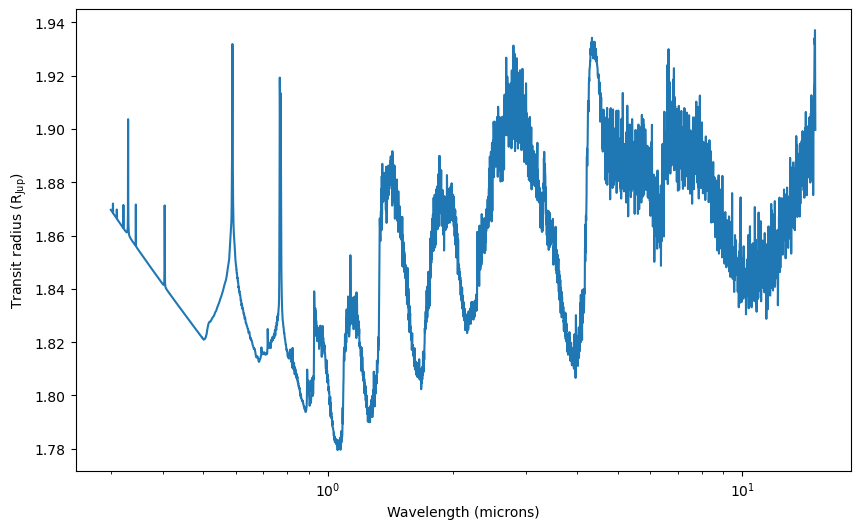

<Figure size 1000x600 with 0 Axes>

In [11]:
import pylab as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.transm_rad/nc.r_jup_mean)

plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.show()
plt.clf()

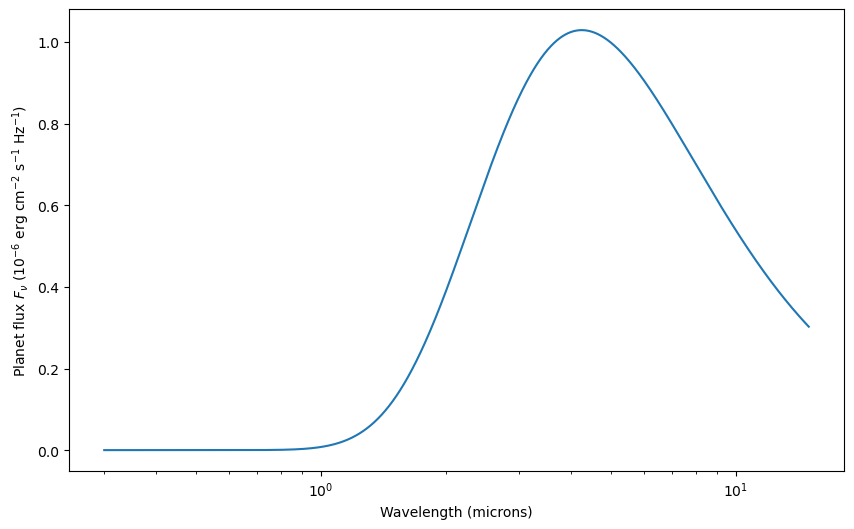

<Figure size 1000x600 with 0 Axes>

In [12]:
atmosphere.calc_flux(temperature, mass_fractions, gravity, MMW)

plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.flux/1e-6)

plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Planet flux $F_\nu$ (10$^{-6}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
plt.show()
plt.clf()

In [13]:
from petitRADTRANS.physics import guillot_global
kappa_IR = 0.01
gamma = 0.4
T_int = 200.
T_equ = 1500.

temperature = guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)

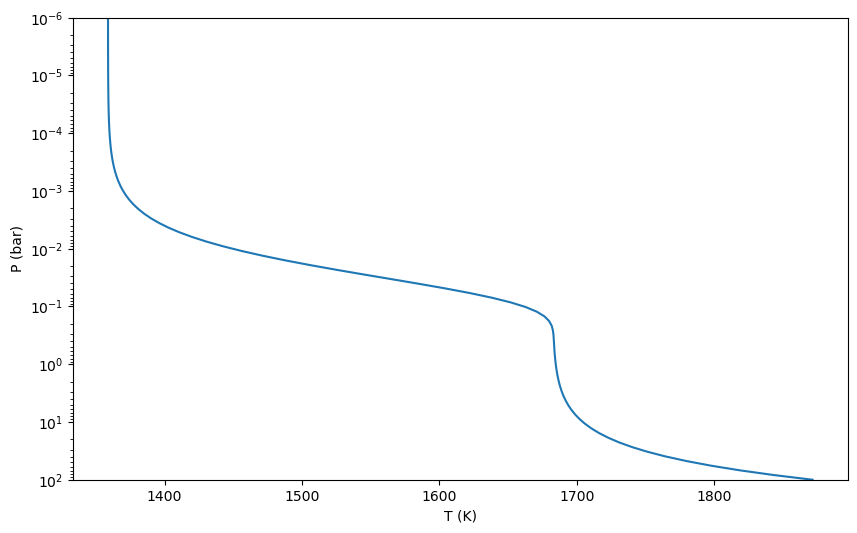

<Figure size 1000x600 with 0 Axes>

In [14]:
plt.plot(temperature, pressures)
plt.yscale('log')
plt.ylim([1e2, 1e-6])
plt.xlabel('T (K)')
plt.ylabel('P (bar)')
plt.show()
plt.clf()

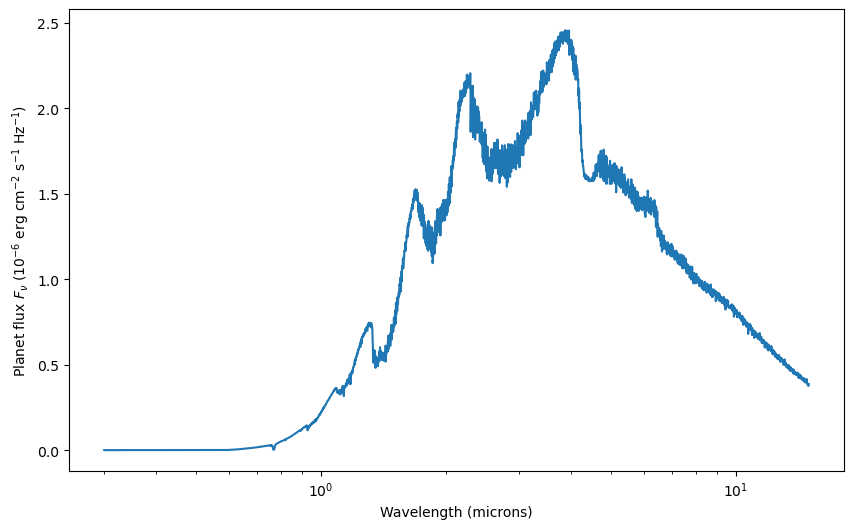

<Figure size 1000x600 with 0 Axes>

In [15]:
atmosphere.calc_flux(temperature, mass_fractions, gravity, MMW)

plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.flux/1e-6)

plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Planet flux $F_\nu$ (10$^{-6}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
plt.show()
plt.clf()